<a href="https://colab.research.google.com/github/siri-orog/notebook/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Installing all Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

**Data Colleection and Preprocessing**

In [ ]:
# load the dataset
data=pd.read_csv('/content/train.csv')

In [ ]:
# print the first 5 rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# no.of rows and columns
data.shape

(891, 12)

In [ ]:
# getting rows information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


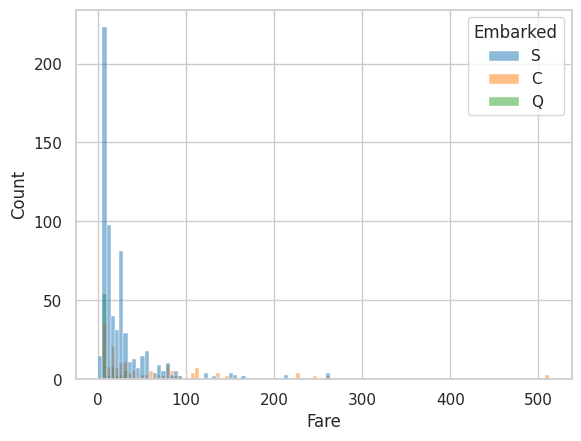

In [ ]:
sns.histplot(data=data, x="Fare", hue="Embarked",palette="tab10");

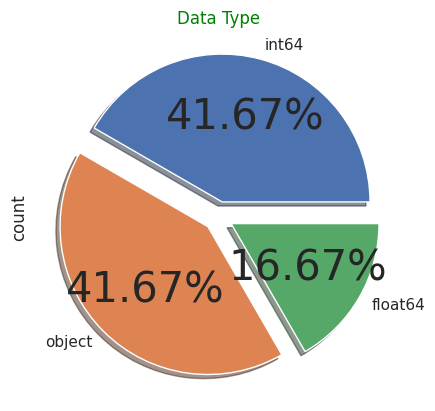

In [ ]:
plt.rcParams.update({'font.size': 30})

data.dtypes.value_counts().plot.pie(explode=[0.1, 0.1, 0.1],
                                       autopct='%1.2f%%',
                                       shadow=True)
plt.title('Data Type',
          color='Green',
          loc='center');

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


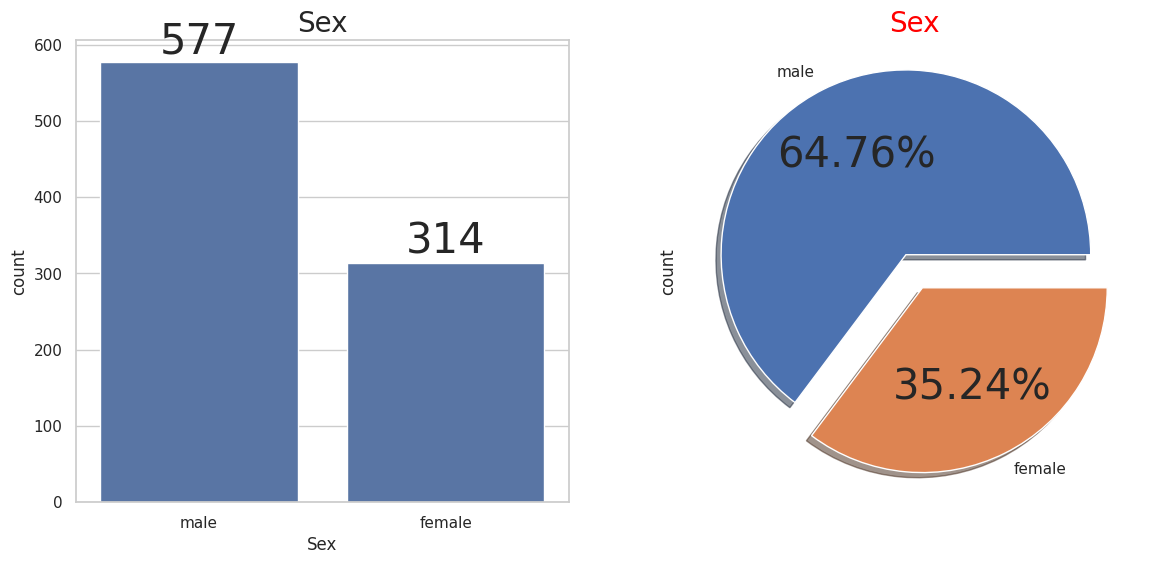

In [ ]:
# To count the male and female
plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Sex', data=data)
ax.bar_label(ax.containers[0])
plt.title("Sex", fontsize=20)

ax =plt.subplot(1,2,2)
ax=data['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Sex", fontsize = 20,color='Red');


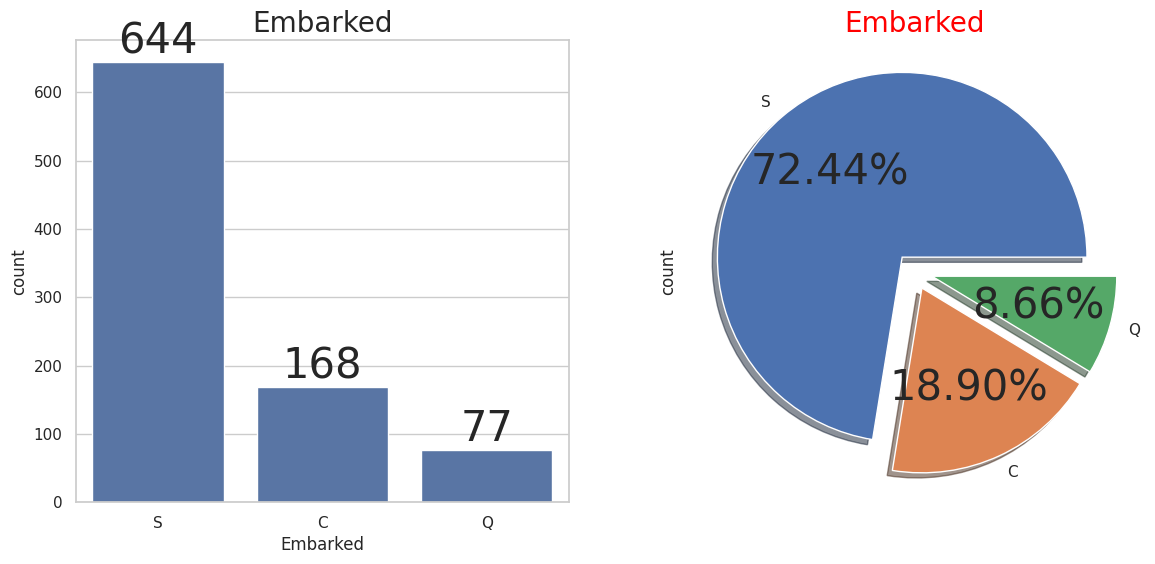

In [ ]:
# To count the embarked
plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Embarked', data=data)
ax.bar_label(ax.containers[0])
plt.title("Embarked", fontsize=20)

ax =plt.subplot(1,2,2)
ax=data['Embarked'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Embarked", fontsize = 20,color='Red');

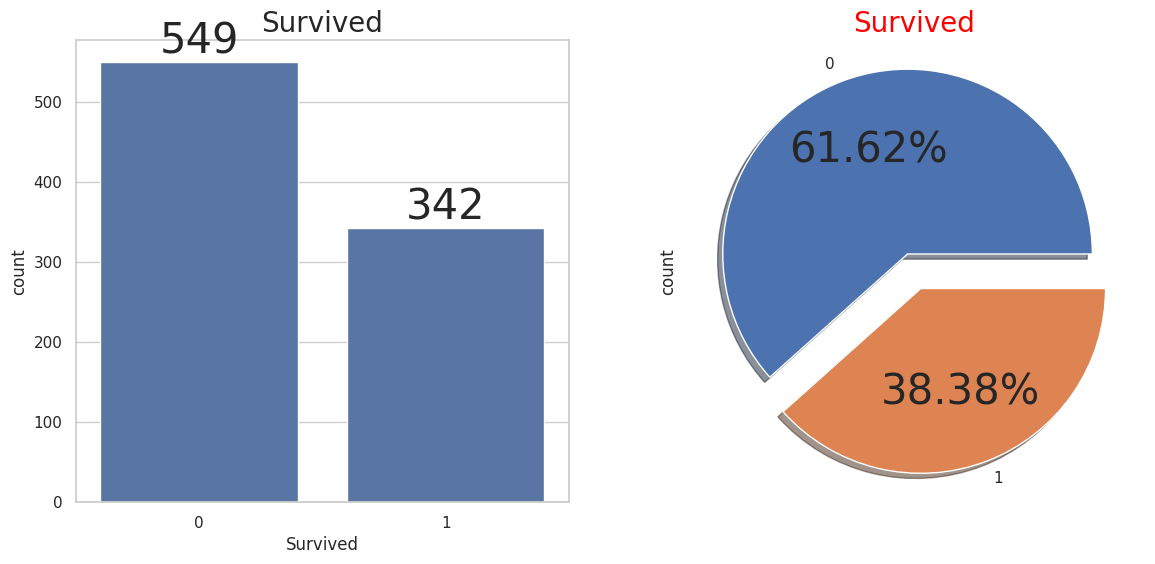

In [ ]:
# to count the survived
plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Survived', data=data)
ax.bar_label(ax.containers[0])
plt.title("Survived", fontsize=20)

ax =plt.subplot(1,2,2)
ax=data['Survived'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Survived", fontsize = 20,color='Red');

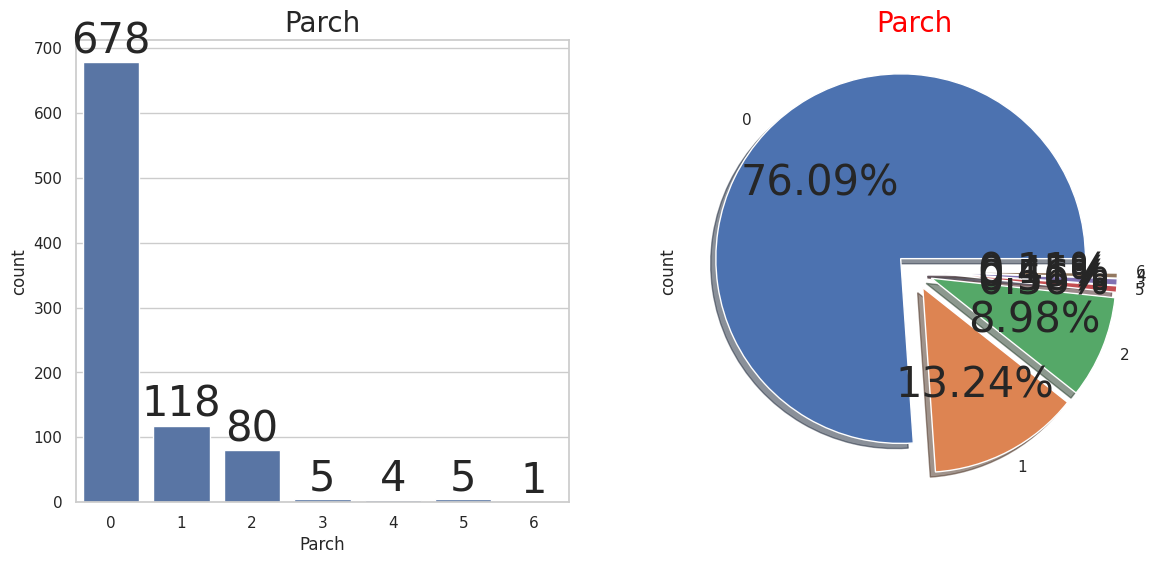

In [ ]:
# To count parch
plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Parch', data=data)
ax.bar_label(ax.containers[0])
plt.title("Parch", fontsize=20)

ax =plt.subplot(1,2,2)
parch_counts = data['Parch'].value_counts()
explode_list = [0.1] * len(parch_counts) # Create an explode list with length equal to the number of unique values
ax=parch_counts.plot.pie(explode=explode_list,autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Parch", fontsize = 20,color='Red');

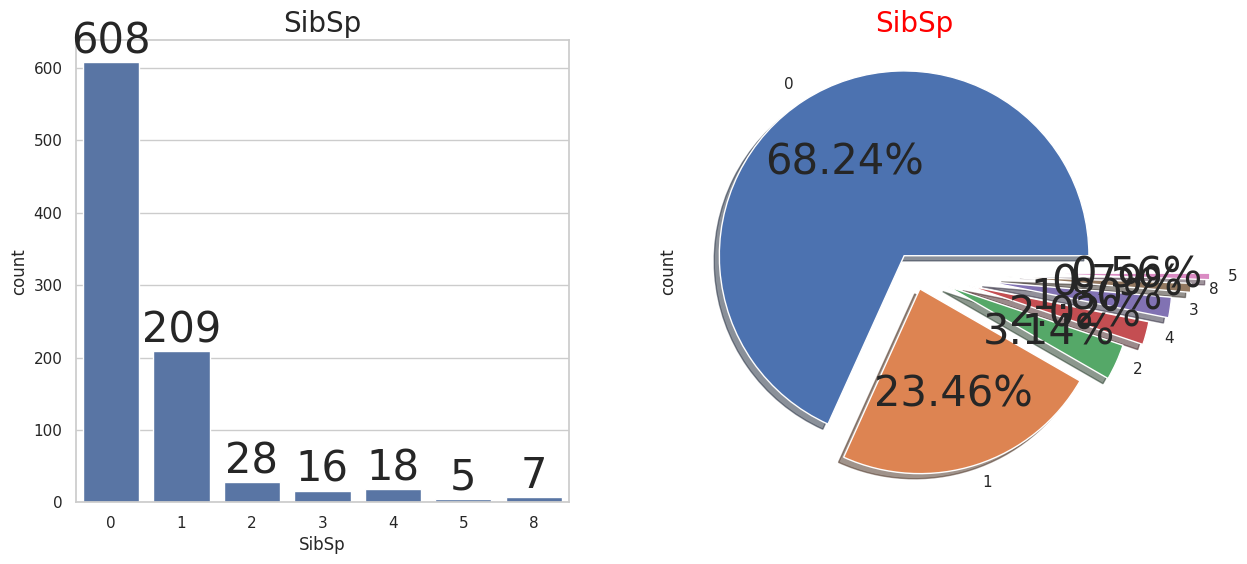

In [ ]:
# To find the sibsp
plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='SibSp', data=data)
ax.bar_label(ax.containers[0])
plt.title("SibSp", fontsize=20)

ax =plt.subplot(1,2,2)
ax=data['SibSp'].value_counts().plot.pie(explode=[0.1, 0.1,0.2,0.3, 0.4,0.5,0.6],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "SibSp", fontsize = 20,color='Red');

In [ ]:
pd.DataFrame(abs(data.corr(numeric_only=True)['Survived'])).sort_values(by='Survived',ascending=False)

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007


In [ ]:
# Calculate the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Display the correlation matrix
display(corr_matrix)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


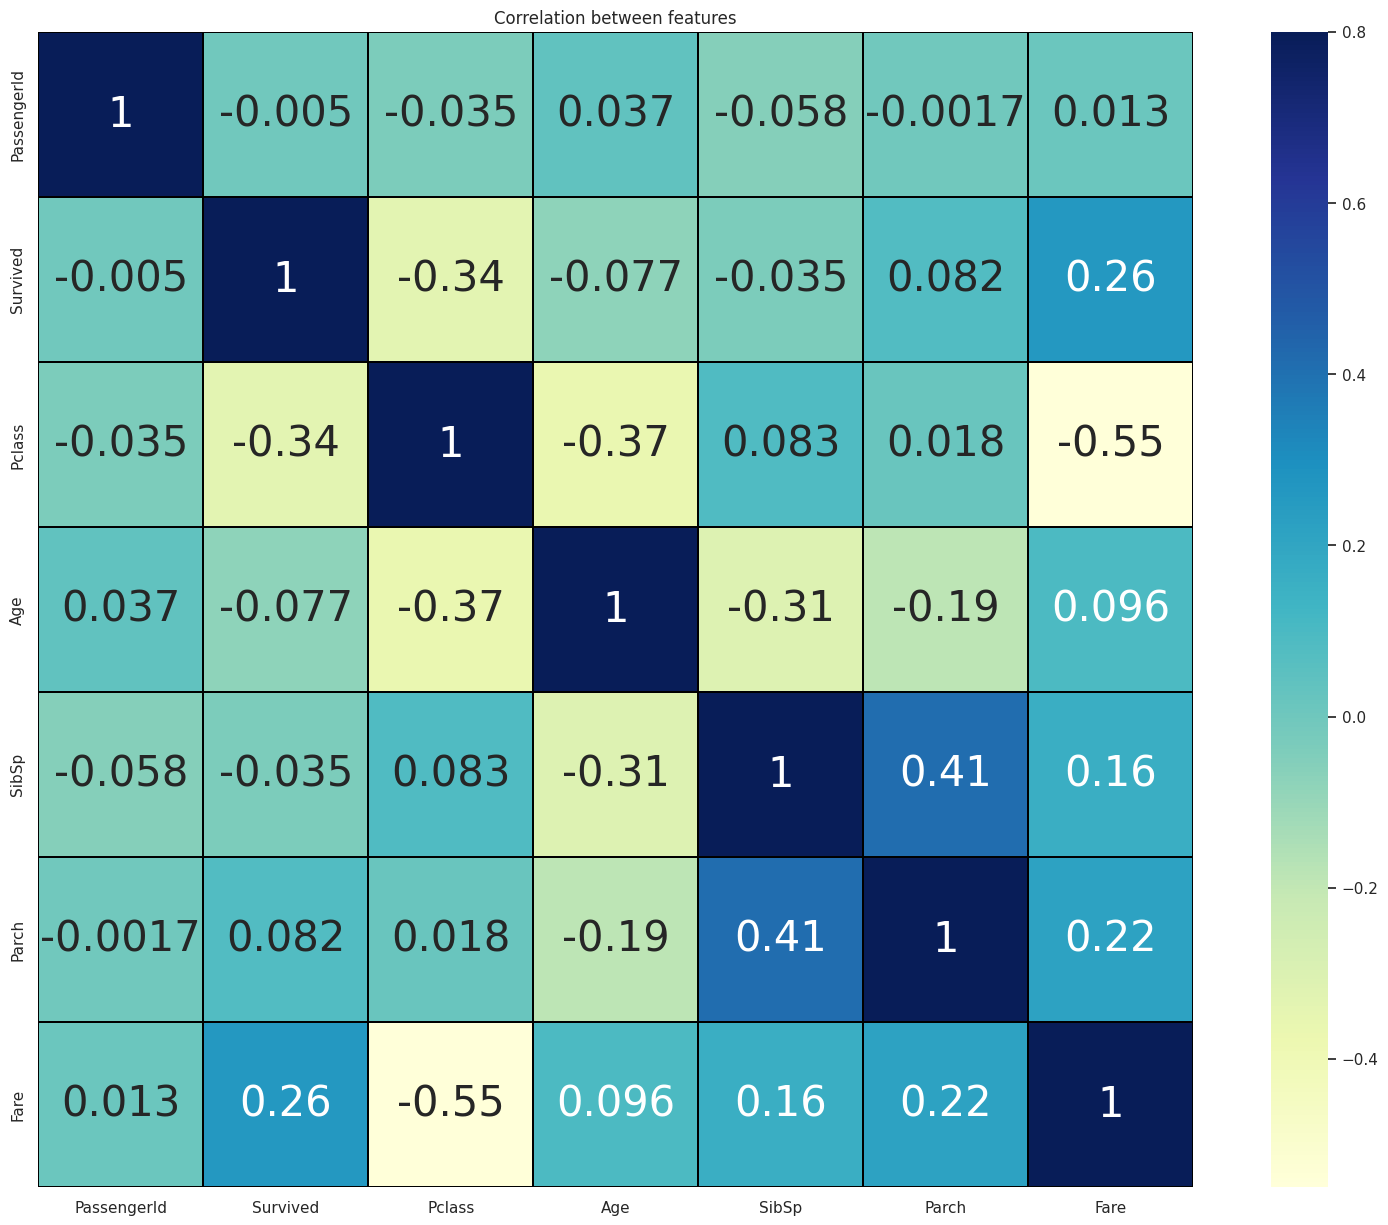

In [ ]:
# Drop non-numeric columns that are not needed for correlation
data_for_corr = data.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked', 'Sex'])

corr = data_for_corr.corr(numeric_only=True)
plt.figure(figsize=(20, 15))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
plt.show()

In [ ]:
# correlation heatmap of higly correlated features with SalePrice

hig_corr = data.corr(numeric_only=True)
hig_corr_features = hig_corr.index[abs(hig_corr["Fare"]) >= 0.25]
hig_corr_features

Index(['Survived', 'Pclass', 'Fare'], dtype='object')

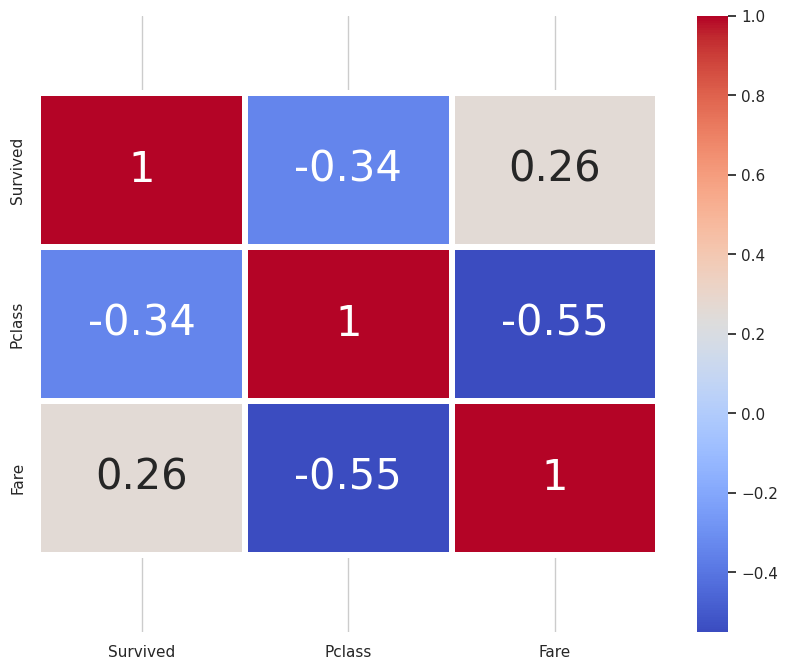

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(data[hig_corr_features].corr(numeric_only=True), cmap = "coolwarm", annot=True, linewidth=3)
# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

**Missing values**

In [ ]:
# check number of missing values
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


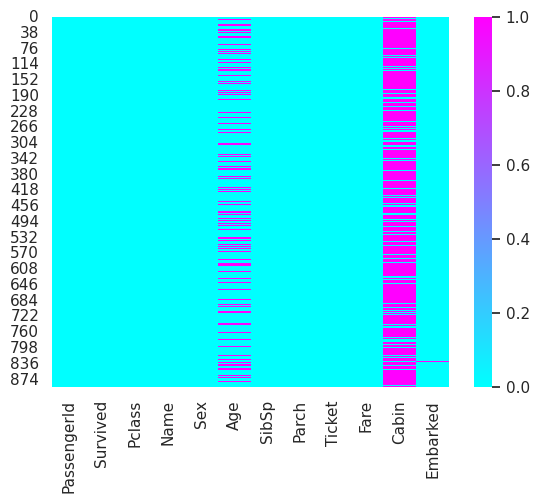

In [ ]:
sns.heatmap(data.isnull(),cmap='cool');

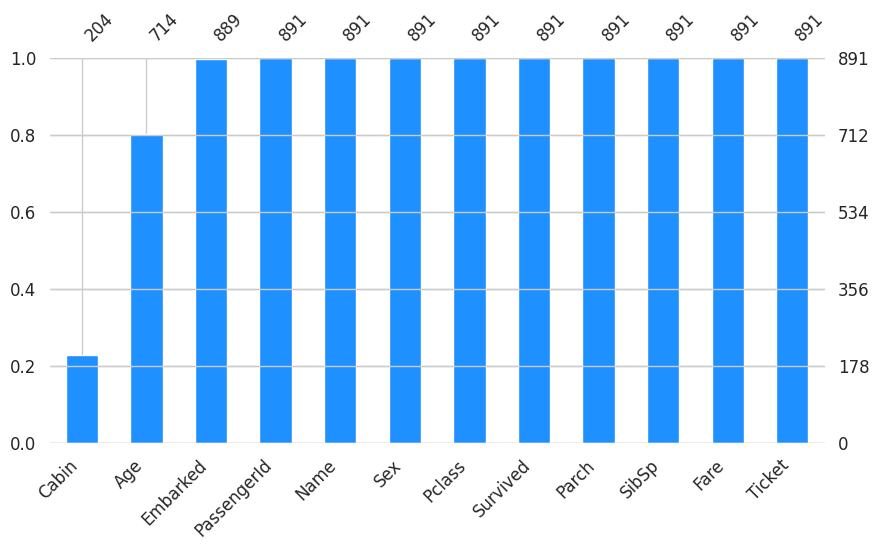

In [ ]:
import missingno
missingno.bar(data, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

**Feature drop**

**Handling the Missing values**

In [ ]:
# drop the cabin column
data=data.drop(columns='Cabin',axis=1)

In [ ]:
# replacing the missing values of each column with mean value
data['Age'].fillna(data['Age'].mean(), inplace=True)

/tmp/ipython-input-265-502876166.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


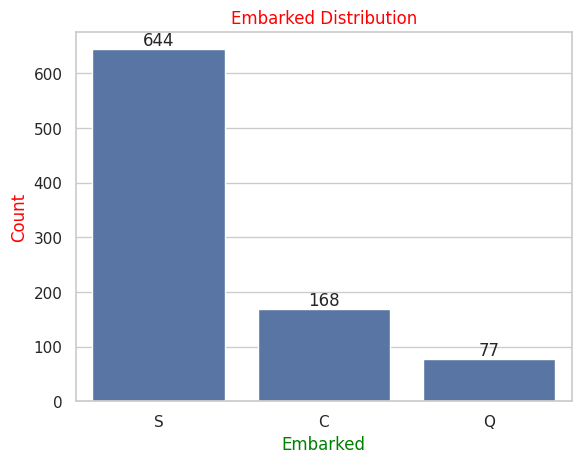

In [ ]:
# embarked distrubition
ax = sns.set(style="whitegrid")
ax = sns.countplot(data=data,x='Embarked');
ax.bar_label(ax.containers[0])

plt.title('Embarked Distribution',color='Red',loc='center');
plt.xlabel('Embarked',color='Green',loc='center')
plt.ylabel('Count',color='Red',loc='center');


In [ ]:
# finding the mode value of the embarked column
print(data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
print(data['Embarked'].mode()[0])

S


**Replacing the Missing values**

In [ ]:
# replacing the missing values in embarked column with mode value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-269-157915128.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**Data Analysis**

In [ ]:
# getting some statistical measures about the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# find the number of people survied and not survied
data['Survived'].value_counts()

,count
Survived,
0,549
1,342


**Data Visualization**

<Axes: xlabel='Survived', ylabel='count'>

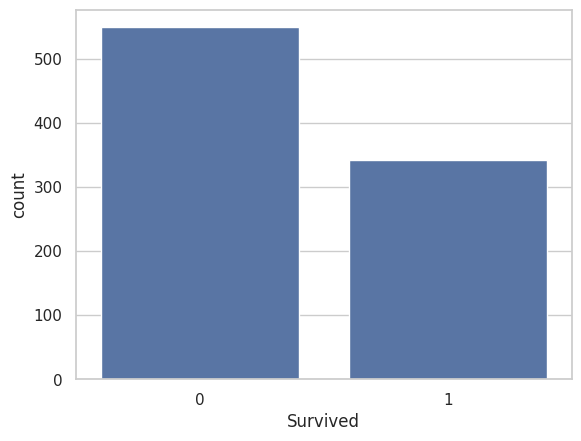

In [ ]:
# making the count plot for the survied column
sns.countplot(x='Survived',data=data)

In [ ]:
# finding the number of people survied and not survied
data['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='count'>

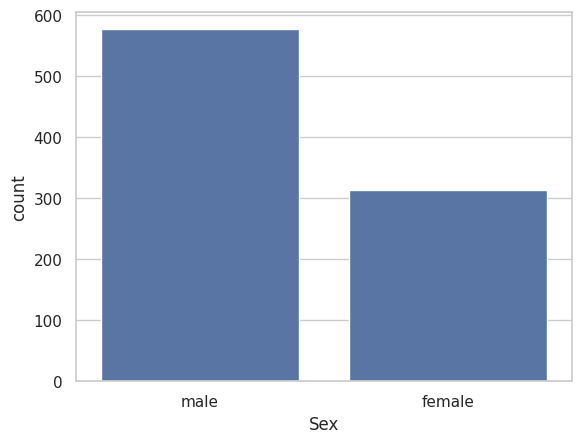

In [ ]:
# making a count plot for sex column
sns.countplot(x='Sex',data=data)

<Axes: xlabel='Sex', ylabel='count'>

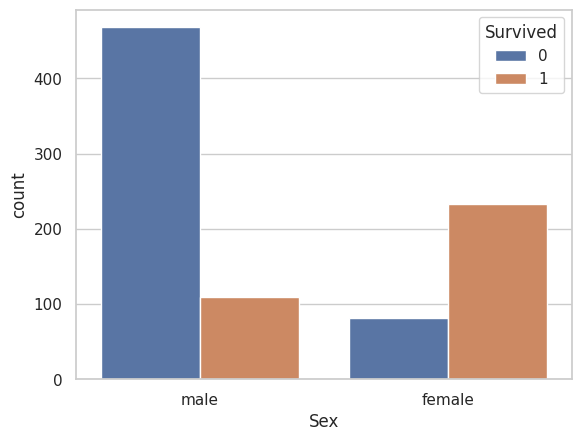

In [ ]:
# number of suvivors gender wise
sns.countplot(x='Sex',hue='Survived',data=data)

<Axes: xlabel='Pclass', ylabel='count'>

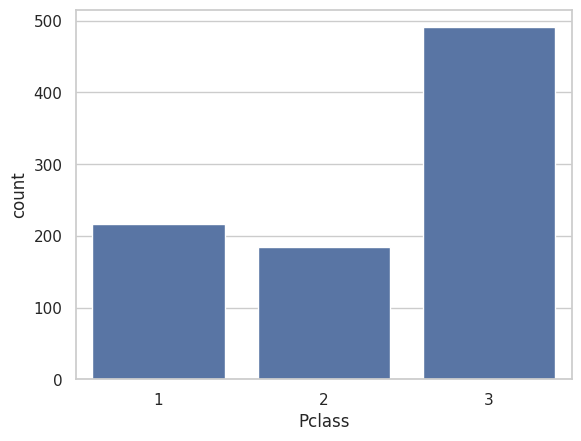

In [ ]:
# making a plot for place column
sns.countplot(x='Pclass',data=data)

<Axes: xlabel='Pclass', ylabel='count'>

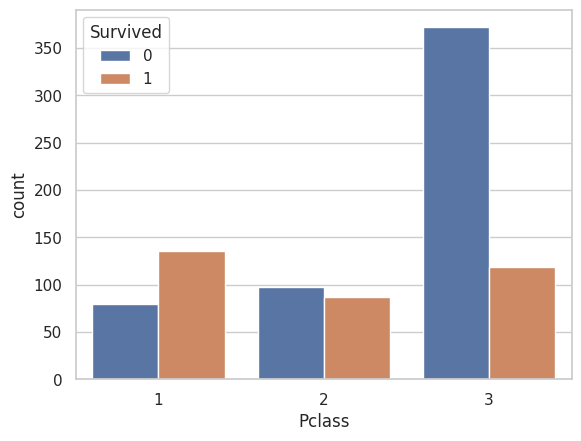

In [ ]:
# number of survivors place wise
sns.countplot(x='Pclass',hue='Survived',data=data)

**Encoding the Categorical Columns**

In [ ]:
data['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
data['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [ ]:
# converting categorical into columns
data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

/tmp/ipython-input-281-743367778.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


**Seperating Features and Target**

In [ ]:
x=data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=data['Survived']

In [ ]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [ ]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


**Splitting the Data into Traning data and test data**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(891, 7) (712, 7) (179, 7)


**Model Selection**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

**Train and compare models**

In [ ]:
# checking train and test accuracy for all models
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(x_train))
    test_acc = accuracy_score(y_test, model.predict(x_test))
    results.append((name, train_acc, test_acc))
    print(f"{name} - Training Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

Logistic Regression - Training Accuracy: 0.8090, Test Accuracy: 0.7821
Random Forest - Training Accuracy: 0.9860, Test Accuracy: 0.8156
KNN - Training Accuracy: 0.8048, Test Accuracy: 0.6760
SVM - Training Accuracy: 0.6798, Test Accuracy: 0.6369
Decision Tree - Training Accuracy: 0.9860, Test Accuracy: 0.7821


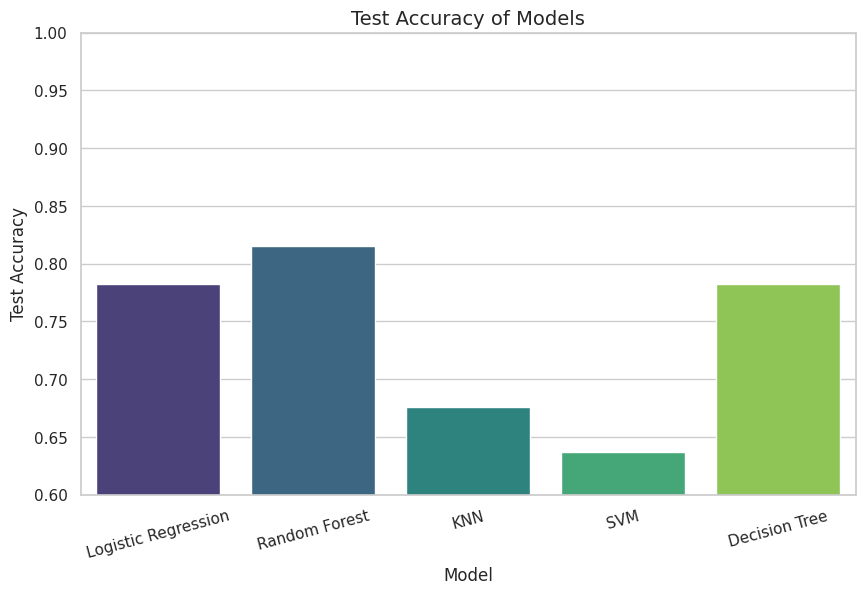

In [ ]:
# visual the result
result_df = pd.DataFrame(results, columns=['Model', 'Train Accuracy', 'Test Accuracy'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Accuracy', hue='Model', legend=False, data=result_df, palette='viridis')
plt.title('Test Accuracy of Models', fontsize=14)
plt.xticks(rotation=15)
plt.ylim(0.6, 1.0)
plt.show()


In [ ]:
# Create DataFrame
df = pd.DataFrame(results, columns=["Model", "Training Accuracy", "Test Accuracy"])

✅ Best Model based on Test Accuracy: Random Forest


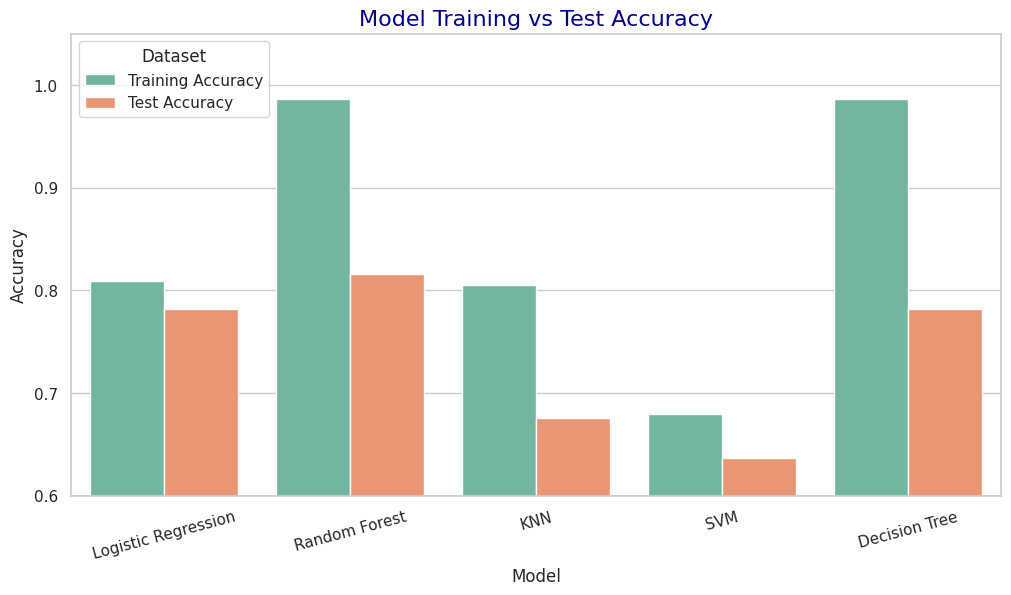

In [ ]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot
df_plot = pd.melt(df, id_vars="Model", value_vars=["Training Accuracy", "Test Accuracy"],
                  var_name="Dataset", value_name="Accuracy")

sns.barplot(data=df_plot, x="Model", y="Accuracy", hue="Dataset", palette="Set2")

# Title and labels
plt.title("Model Training vs Test Accuracy", fontsize=16, color='darkblue')
plt.xticks(rotation=15)
plt.ylim(0.6, 1.05)

# Highlight the best test accuracy model (Random Forest)
best_model = df[df["Test Accuracy"] == df["Test Accuracy"].max()]["Model"].values[0]
print(f"✅ Best Model based on Test Accuracy: {best_model}")

plt.show()


In [ ]:
# checking the model accuracy
from sklearn.metrics import accuracy_score

# After training your models
for name, model in models.items():
    model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"{name} Accuracy Score on Test Set: {accuracy:.4f}")

Logistic Regression Accuracy Score on Test Set: 0.7821
Random Forest Accuracy Score on Test Set: 0.8156
KNN Accuracy Score on Test Set: 0.6760
SVM Accuracy Score on Test Set: 0.6369
Decision Tree Accuracy Score on Test Set: 0.7877


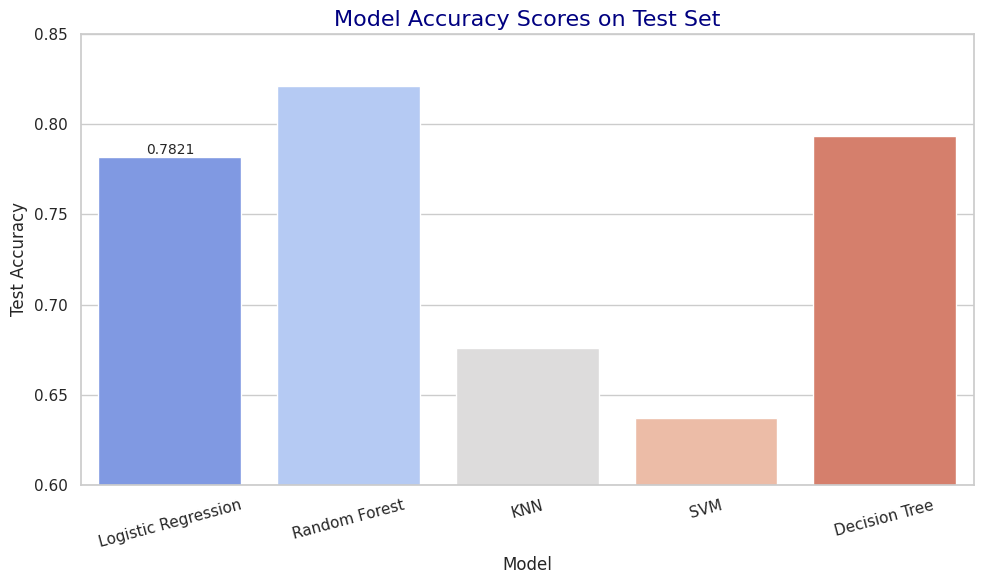

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'KNN', 'SVM', 'Decision Tree'],
    'Test Accuracy': [0.7821, 0.8212, 0.6760, 0.6369, 0.7933]
}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x='Model', y='Test Accuracy', hue='Model', data=df, palette='coolwarm', legend=False)

# Bar labels
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=10)

# Chart formatting
plt.title('Model Accuracy Scores on Test Set', fontsize=16, color='navy')
plt.ylim(0.6, 0.85)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of all accuracy metrics
data = [
    ['Logistic Regression', 0.8090, 0.7821, 0.7821],
    ['Random Forest', 0.9860, 0.7989, 0.8212],
    ['KNN', 0.8048, 0.6760, 0.6760],
    ['SVM', 0.6798, 0.6369, 0.6369],
    ['Decision Tree', 0.9860, 0.7821, 0.7933]
]

# Create DataFrame
df = pd.DataFrame(data, columns=['Model', 'Training Accuracy', 'Testing Accuracy', 'Model Accuracy'])


In [ ]:
# Melt the DataFrame to long format
df_melted = pd.melt(df, id_vars='Model',
                    value_vars=['Training Accuracy', 'Testing Accuracy', 'Model Accuracy'],
                    var_name='Metric', value_name='Accuracy')


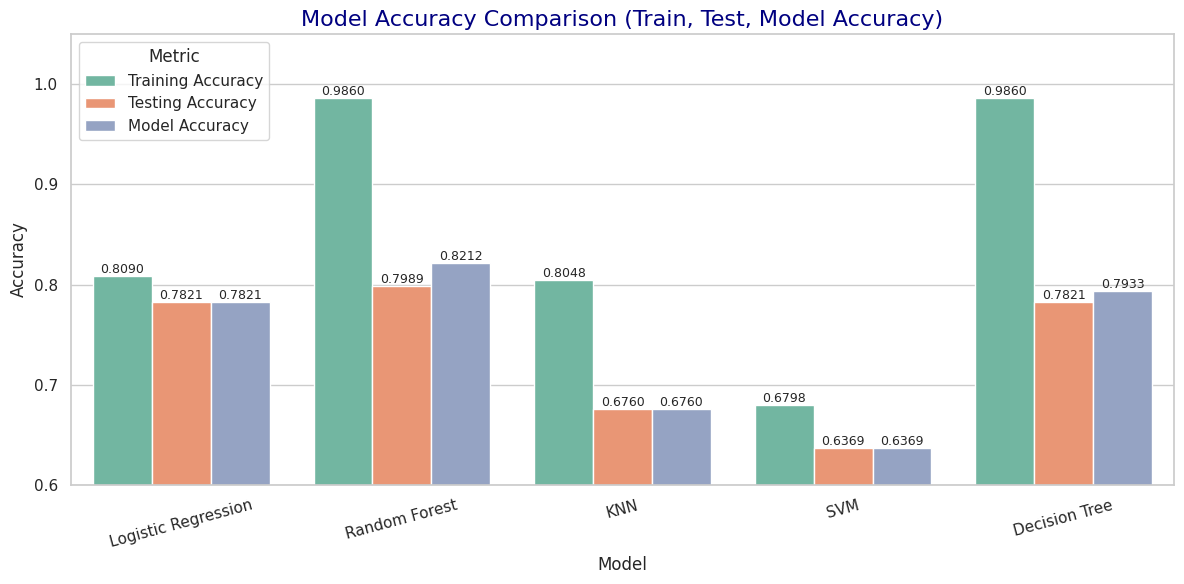

In [ ]:
# Set style and plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create grouped barplot
ax = sns.barplot(x='Model', y='Accuracy', hue='Metric', data=df_melted, palette='Set2')

# Annotate bars
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=9)
ax.bar_label(ax.containers[1], fmt='%.4f', fontsize=9)
ax.bar_label(ax.containers[2], fmt='%.4f', fontsize=9)

# Format chart
plt.title("Model Accuracy Comparison (Train, Test, Model Accuracy)", fontsize=16, color='navy')
plt.ylim(0.6, 1.05)
plt.xticks(rotation=15)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


**BEST MODEL - Random Forest**

**Hyperparameter Tuning the Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini']
}


**Train the Model**

In [ ]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

# Fit the model
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [10, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

**Model Evaluate**

In [ ]:
# evaluate the performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test set
y_pred = model.predict(x_test)

# Accuracy
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Full Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.7877094972067039

Confusion Matrix:
 [[83 17]
 [21 58]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.77      0.73      0.75        79

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



**Predictive System**

In [ ]:
import pandas as pd
import joblib

#  Correct predictive function
def predict_survival(Pclass, Sex, Age, SibSp, Parch, Fare, Embarked):
    # Create a DataFrame with column names that match the training data
    input_df = pd.DataFrame([{
        'Pclass': Pclass,
        'Sex': Sex,
        'Age': Age,
        'SibSp': SibSp,
        'Parch': Parch,
        'Fare': Fare,
        'Embarked': Embarked
    }])

    # Load the trained model
    model = joblib.load('titanic_model.pkl')

    # Make prediction (DataFrame input avoids warning)
    prediction = model.predict(input_df)[0]

    # Return readable result
    return "🎉 Survived" if prediction == 1 else "💀 Did Not Survive"


In [ ]:
# New passenger data
result = predict_survival(3, 0, 22.000000, 1, 0, 7.2500, 0)

# Print prediction result
print("Prediction Result:", result)

Prediction Result: 💀 Did Not Survive


**Save the Model**

In [ ]:
import joblib
final_model = grid_search.best_estimator_

In [ ]:
# Save the trained model
joblib.dump(final_model, 'titanic_model.pkl')
print(" Model saved as titanic_model.pkl")

 Model saved as titanic_model.pkl


In [ ]:
!pip install gradio


In [ ]:
import gradio as gr
import pandas as pd
import joblib

# Load trained model (Random Forest)
model = joblib.load("titanic_model.pkl")

# Define prediction function
def predict_survival(Pclass, Sex, Age, SibSp, Parch, Fare, Embarked):
    input_df = pd.DataFrame([{
        'Pclass': int(Pclass),
        'Sex': int(Sex),
        'Age': float(Age),
        'SibSp': int(SibSp),
        'Parch': int(Parch),
        'Fare': float(Fare),
        'Embarked': int(Embarked)
    }])
    prediction = model.predict(input_df)[0]
    return "🎉 Survived" if prediction == 1 else "💀 Did Not Survive"

# Gradio interface
interface = gr.Interface(
    fn=predict_survival,
    inputs=[
        gr.Dropdown([1, 2, 3], label="Passenger Class (Pclass)"),
        gr.Radio([0, 1], label="Sex (0 = Male, 1 = Female)"),
        gr.Number(label="Age"),
        gr.Number(label="Siblings/Spouses Aboard (SibSp)"),
        gr.Number(label="Parents/Children Aboard (Parch)"),
        gr.Number(label="Fare"),
        gr.Dropdown([0, 1, 2], label="Embarked (0=S, 1=C, 2=Q)")
    ],
    outputs=gr.Text(label="Prediction Result"),
    title="🚢 Titanic Survival Prediction",
    description="Enter passenger details to predict survival."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://39972a9860586c3bd1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
